In [2]:
import time
import ROOT
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
from root_numpy import fill_hist
import config
import data
import models
import train

def gpu_setup():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
            
gpu_setup()

3 Physical GPUs, 3 Logical GPUs


# Markdown example
$e^{i\pi} + 1 = 0$

In [2]:
def test_model(conf, model):
    test_ds = data.get_test_ds(conf.input_dirs, conf.img_shape)
    test_ds = test_ds.batch(conf.batch_size)
    
    predictions_list = []    
    labels_dict = {'pdg': [], 'type': [], 'vtxX': [], 'vtxY': [], 'vtxZ': [], 'dirTheta': [], 'dirPhi': [], 'nuEnergy': [], 'lepEnergy': []}
    
    # Run predictions on individual batches of the dataset
    start_time = time.time()  # Time how long it takes
    for x, y in test_ds:
        predictions = model.model.predict(x)
        predictions_list.append(predictions)        
        for name, array in list(y.items()):
            labels_dict[name].append(array.numpy())
    print("--- %s seconds to test ---" % (time.time() - start_time))
        
    predictions = np.concatenate(predictions_list).ravel()
    for key in labels_dict:
        labels_dict[key] = np.concatenate(labels_dict[key]).ravel()
    return predictions, labels_dict

conf = config.process_config("/mnt/storage/jtingey/chips-cvn/config/single_par_test.json")
conf.exp_dir = "/mnt/storage/jtingey/chips-cvn/experiments/single_par/"

predictions_list = []
labels_dict_list = []

for epoch in range(1,6):
    model = models.get_trained_model(conf, epoch)
    predictions, labels_dict = test_model(conf, model)
    predictions_list.append(predictions)
    labels_dict_list.append(labels_dict)

--- 10.901543855667114 seconds to test ---
--- 9.013669967651367 seconds to test ---
--- 8.842470169067383 seconds to test ---
--- 9.076089859008789 seconds to test ---
--- 8.851728677749634 seconds to test ---


In [5]:
'''
for epoch in range(5):
    diff = np.subtract(predictions_list[epoch], labels_dict_list[epoch]["lepEnergy"])
    plt.hist(diff, bins = 100, range=(-1000,1000)) 
    plt.title("histogram") 
    plt.show()
'''
diff = np.subtract(predictions_list[4], labels_dict_list[4]["lepEnergy"])

    


In [3]:
%jsroot on
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()
c.Draw()

--- 15.439783811569214 seconds ---


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


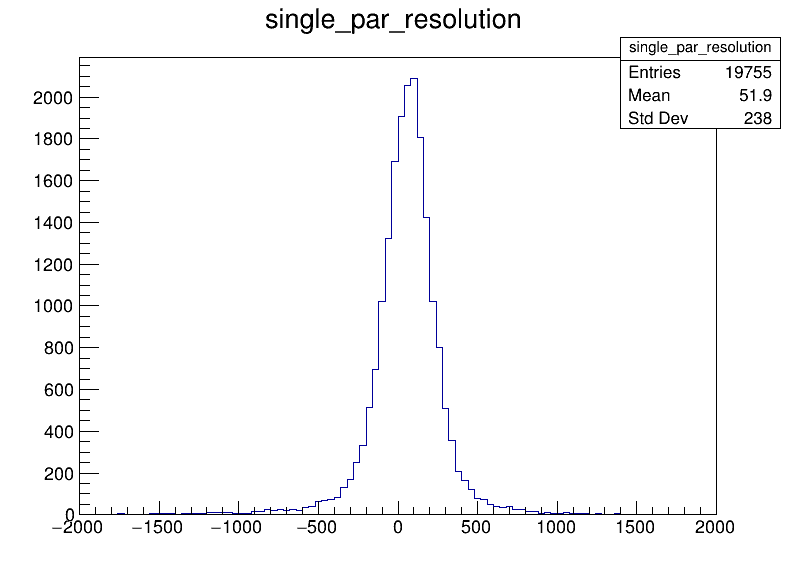

In [7]:
def single_par_resolution(conf, model):
    single_par_resolution_h = ROOT.TH1F("single_par_resolution", "single_par_resolution", 100, -2000, 2000)
    test_ds = data.get_test_ds(conf.input_dirs, conf.img_shape)
    test_ds = test_ds.batch(64)
    start_time = time.time()
    for x, y in test_ds:
        predictions = model.model.predict(x)
        for i in range(len(predictions)):
            single_par_resolution_h.Fill(float(predictions[i] - y["lepEnergy"][i]))
    print("--- %s seconds ---" % (time.time() - start_time))
    return single_par_resolution_h

hist = single_par_resolution(conf, model)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
hist.Draw()
c.Draw()

In [20]:
channels = conf.shape[]

random = tf.random.uniform(shape=[64,64,64,1], minval=0.8, maxval=1.2)

random = tf.random.uniform(shape=[64,64,64,3], minval=0.8, maxval=1.2)


for example in test_ds.take(1):
    print(example[0].shape)
    print(random.shape)
    output = tf.multiply(example[0], random)
    print(output.shape)

(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
